# Анализ пространственных данных. Домашнее задание №2

Мягкий дедлайн: __4 ноября 2020 г. 23:59__

Жесткий дедлайн (со штрафом в _50%_ от количества набранных вами за ДЗ баллов): __5 ноября 2020 г. 08:59__

Визуализация "чего-либо" __без__ выполненного основного задания оценивается в __0 баллов__

ФИО: `Джемадинов Эскендер Рустемович`

Группа: `MADE-ML-32`

## Задание №1. Горячая точка (алгоритм - 10 баллов, визуализация - 10 баллов).

Генерируйте рандомные точки на планете Земля до тех пор, пока не попадете на территорию ``Афганистана``

1. Вы можете использовать функции принадлжености точки полигону и расстояния от точки до полигона (в метрах)
2. Предложите не наивный алгоритм поиска (генерировать __напрямую__ точку из полигона границ Афганистана __запрещено__)

In [1]:
!pip install reverse_geocoder

!pip install plotly_express
    
!pip install folium

!pip install osmnx 

!pip install geometry

!pip install overpy

You should consider upgrading via the '/home/eskender/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/eskender/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/eskender/anaconda3/bin/python -m pip install --upgrade pip' command.
Processing /home/eskender/.cache/pip/wheels/b4/39/cd/d8346b3f7e6a82122550234d433471e6eaedf435573b9e07d7/Rtree-0.9.4-py3-none-any.whl
  Attempting uninstall: Rtree
    Found existing installation: Rtree 0.8.3
    Uninstalling Rtree-0.8.3:
      Successfully uninstalled Rtree-0.8.3
You should consider upgrading via the '/home/eskender/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/home/eskender/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/eskender/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# Двузначные коды стран с полным названием
!wget https://datahub.io/core/country-list/r/data.csv

--2020-11-05 07:54:36--  https://datahub.io/core/country-list/r/data.csv
Resolving datahub.io (datahub.io)... 104.18.49.253, 172.67.157.38, 104.18.48.253, ...
Connecting to datahub.io (datahub.io)|104.18.49.253|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv [following]
--2020-11-05 07:54:43--  https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.18.48.253, 172.67.157.38, 104.18.49.253, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.18.48.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4120 (4,0K) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   4,02K  --.-KB/s    in 0s      

2020-11-05 07:54:44 (28,3 MB/s) - ‘data.csv.1’ saved [4120/4120]



In [3]:
from random import uniform
import geocoder

import shapefile
import reverse_geocoder as rg 
import pandas as pd

import geopandas as gpd
from shapely import wkt

#from shapely.geometry.point import Point
import geopandas as gpd

from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import openrouteservice

from openrouteservice import client, places

from shapely import wkt, geometry


import overpy


In [4]:
def newpoint():
    return uniform(-180,180), uniform(-90, 90)

def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    return result


In [5]:
countries = pd.read_csv("data.csv")

countries = dict(zip(countries.Code, countries.Name))


In [6]:
countries['AF']

'Afghanistan'

In [9]:
# Наивное решение, простая генерация. 

geo = ""

while geo != 'Afghanistan':
    
    coordinates =newpoint()
    
    location = reverseGeocode(coordinates)

    if location[0]['cc'] in countries.keys():
        geo = countries[location[0]['cc']]
        print("Random point! We're in {0}".format(geo))

Random point! We're in French Southern Territories
Random point! We're in Argentina
Random point! We're in Pakistan
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in Cocos (Keeling) Islands
Random point! We're in United States
Random point! We're in Burkina Faso
Random point! We're in French Southern Territories
Random point! We're in Argentina
Random point! We're in Canada
Random point! We're in Saint Helena, Ascension and Tristan da Cunha
Random point! We're in Greenland
Random point! We're in Argentina
Random point! We're in French Southern Territories
Random point! We're in French Southern Territories
Random point! We're in Argentina
Random point! We're in French Southern Territories
Random point! We're in Canada
Random point! We're in Argentina
Random point! We're in South Africa
Random point! We're in Svalbard and Jan Mayen
Random point! We're in Svalbard and Jan Mayen
Random point! We're in Russian Federation
Random point! We're in Greenl

Random point! We're in Greenland
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in Russian Federation
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in Svalbard and Jan Mayen
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in Canada
Random point! We're in French Southern Territories
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in Argentina
Random point! We're in Brazil
Random point! We're in Brazil
Random point! We're in Russian Federation
Random point! We're in French Guiana
Random point! We're in Iceland
Random point! We're in Peru
Random point! We're in Norway
Random point! We're in Argentina
Random point! We're in Canada
Random point! We're in Russian Federation
Random point! We're in South Georgia and the South Sandwich Islands
Random point! We're in S

In [10]:
countries_pol = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))\
                .rename(columns={"name":"country_name"})
poly = wkt.loads(str(countries_pol[countries_pol.country_name=='Afghanistan']['geometry'].values[0]))


In [11]:
# Продвинутое решение. Генерируем точку (x,y). Далее генерируем точку в окрестности(okr_x, okr_y) 
# с координатами (x_, y_), если она ближе идём к ней, нет, в противоположном направлении
# (не обязательно в ближайшем). При этом уменьшаем шаг диапазона на параметр alpha (чтобы не ходить туда сюда).  

def newpoint_corr(x, y, okr_x, okr_y):
    return uniform(max(x-okr_x,-180), min(x+okr_x, 180)),  uniform(max(y- okr_y, -90), min(y+okr_y, 90))

geo = ""

latlon =[]

okr_x = 10
okr_y = 10
alpha = 0.99

x, y = newpoint()
x_ = 0 
y_ = 0

while geo != 'Afghanistan':
    
    x_, y_ = newpoint_corr(x, y, okr_x, okr_y)        
    pt = wkt.loads("POINT({} {})".format(x_, y_))    
    pt_pred = wkt.loads("POINT({} {})".format(x, y))    
    
    if poly.distance(pt) < poly.distance(pt_pred):

        x, y = x_, y_
          
        location = reverseGeocode((y, x))

    else: 

        x = x - (x-x_)*-1
        y = y - (y-y_)*-1            

        location = reverseGeocode((y, x))
        
    latlon.append((x, y))
        
    if location[0]['cc'] in countries.keys():
        geo = countries[location[0]['cc']]

        okr_x = okr_x*alpha
        okr_y = okr_y*alpha
        print("loss: {0}. We're in {1} currenly".format(poly.distance(pt), countries[location[0]['cc']]))


loss: 234.40609513289377. We're in New Zealand currenly
loss: 245.17515536800488. We're in French Polynesia currenly
loss: 214.93395306560288. We're in French Polynesia currenly
loss: 203.80923031335783. We're in French Polynesia currenly
loss: 206.48376191305118. We're in Pitcairn currenly
loss: 190.64842407956303. We're in Pitcairn currenly
loss: 198.86127445783708. We're in Chile currenly
loss: 183.32094671582493. We're in Chile currenly
loss: 177.29198360489355. We're in Chile currenly
loss: 182.67658494699586. We're in Chile currenly
loss: 180.24457876160056. We're in Ecuador currenly
loss: 161.25380136386795. We're in Ecuador currenly
loss: 171.34330291000438. We're in Ecuador currenly
loss: 144.6786749006243. We're in Ecuador currenly
loss: 153.72148670830282. We're in Colombia currenly
loss: 136.91005374362658. We're in Colombia currenly
loss: 133.65443660720356. We're in Venezuela, Bolivarian Republic of currenly
loss: 133.69311906324498. We're in Dominican Republic currenly
l

Визуализируйте пошагово предложенный алгоритм при помощи ``Folium``

In [12]:
import folium

In [13]:
mapit = folium.Map( location=[ latlon[0][1], latlon[0][0] ] )

for index, coord in enumerate(latlon):
    if index < len(latlon) -1:  
        folium.Marker( location=[ coord[1], coord[0] ], fill_color='#43d9de', radius=7 ).add_to( mapit )
    else:
        folium.Marker( location=[ coord[1], coord[0]] ,popup='Some Other Location',
                                 icon=folium.Icon(color='red', icon='info-sign')).add_to(mapit)

In [14]:
mapit

## Задание №2. Качество жизни (20 баллов).

Для измерения показателя качества жизни в точке, найденной в предыдущем задании, вам необходимо рассчитать следующую сумму расстояний (в метрах):

1. Расстояние от точки до 5 ближайших __*__ банкоматов, находящихся в стране с наибольшим количеством объектов жилой недвижимости
2. Расстояние от точки до 5 ближайших школ, находящихся в стране с наибольшим количеством аптек в столице
3. Расстояние от точки до 5 ближайших кинотеатров, наодящихся в стране с самым большим отношением числа железнодорожных станций к автобусным остановкам в южной части __**__

__*__ При поиске _N_ ближайших объектов обязательно использовать ``R-tree``

__**__ Южной частью страны является территория, находящаяся к югу от множества точек, равноудаленных от самой северной и самой южной точек страны

## Задание №3. Поездка по Нью-Йорку (маршрут - 20 баллов, визуализация - 10 баллов).

Добраться __на автомобиле__ от входа в ``Central Park`` __Нью-Йорка__ (со стороны ``5th Avenue``) до пересечения ``Water Street`` и ``Washington Street`` в Бруклине (откуда получаются лучшие фото Манхэттенского моста) довольно непросто - разумеется, из-за вечных пробок. Однако еще сложнее это сделать, проезжая мимо школ, где дети то и дело переходят дорогу в неположенном месте.

Вам необходимо построить описанный выше маршрут, избегая на своем пути школы. Визуализируйте данный маршрут (также добавив школы и недоступные для проезда участки дорог) при помощи ``Folium``

Данные о расположении школ Нью-Йорка можно найти [здесь](https://catalog.data.gov/dataset/2019-2020-school-point-locations)

In [73]:
def create_graph(loc, dist, transport_mode, loc_type="address"):

    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

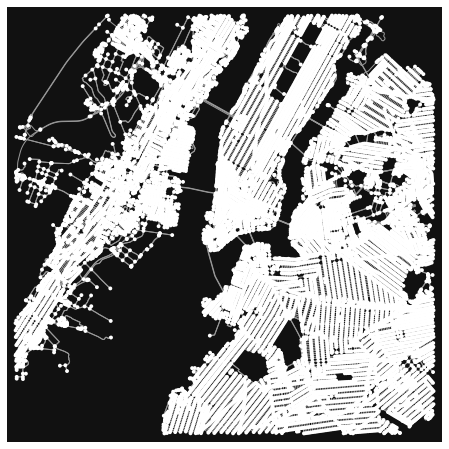

In [89]:
# Создание графа города
G = create_graph('New York', 10000, "drive")
ox.plot_graph(G)

# Маршрут 5th Avenue to Washington Street/Water street
start = (40.79650,-73.94955)
end = (40.70323,-73.98945)

In [90]:
# Извлекаем школы
schools = pd.read_csv("schools.csv")

In [91]:

lat = []
lon = []



for i in schools['the_geom']:
    tup = i.replace("(", '').replace(")", "").split(" ")
    
    lon.append(float(tup[1]))
    lat.append(float(tup[2]))
    


In [92]:
G = ox.add_edge_speeds(G) 
G = ox.add_edge_travel_times(G)


for i in range(len(lon)):
    # находим ближайшие к школам и удаляем их вместе с рёбрами

    school_node = ox.get_nearest_node(G, (lat[i], lon[i]))
    
    nb =  [i for i in G.neighbors(school_node)]
    
    for j in nb:

        G.remove_edge(school_node, j)    
    G.remove_node(school_node)

    
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)

route = nx.shortest_path(G, start_node, end_node, weight='travel_time')

In [93]:
node_start = []
node_end = []
X_to = []
Y_to = []
X_from = []
Y_from = []
length = []
travel_time = []
for u, v in zip(route[:-1], route[1:]):
    node_start.append(u)
    node_end.append(v)
    length.append(round(G.edges[(u, v, 0)]['length']))
    travel_time.append(round(G.edges[(u, v, 0)]['travel_time']))
    X_from.append(G.nodes[u]['x'])
    Y_from.append(G.nodes[u]['y'])
    X_to.append(G.nodes[v]['x'])
    Y_to.append(G.nodes[v]['y'])



In [94]:
df = pd.DataFrame(list(zip(node_start, node_end, X_from, Y_from, X_to, Y_to, length, travel_time)), 
                  
                columns =["node_start", "node_end", "X_from", "Y_from", "X_to", "Y_to",
                          "length", "travel_time"])


In [98]:
#визуализация
m = folium.Map(location=[lat[len(lat) - 1], lon[len(lon) - 1]],
              zoom_start=15)

loc = [(row['Y_from'], row['X_from']) for index, row in df.iterrows()]
folium.PolyLine(loc,
                color='green',
                weight=6,
                opacity=0.8).add_to(m)


for i in range(len(lon)):
    
    folium.Marker((lat[i], lon[i])).add_to(m)


In [99]:
m